In [1]:
import pandas as pd

data = pd.read_csv('data.csv')

print(type(data))
data.head()

data.drop(['id'], axis=1, inplace=True)

data.head()

data = pd.get_dummies(data=data, dtype=int, columns=['diagnosis'])
data

data.drop(['diagnosis_B'], axis=1, inplace=True)

data.head()

y = data.pop('diagnosis_M')
X = data.copy()

print(y.head())
print(X.head())

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy={0:500, 1:500}, k_neighbors=2, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print(len(y_res))
print(len(X_res))



<class 'pandas.core.frame.DataFrame'>
0    1
1    1
2    1
3    1
4    1
Name: diagnosis_M, dtype: int64
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430       

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your features and target variable respectively
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
importances = model.feature_importances_

In [5]:
feature_names = X_train.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["importance"]).sort_values("importance", ascending=False)

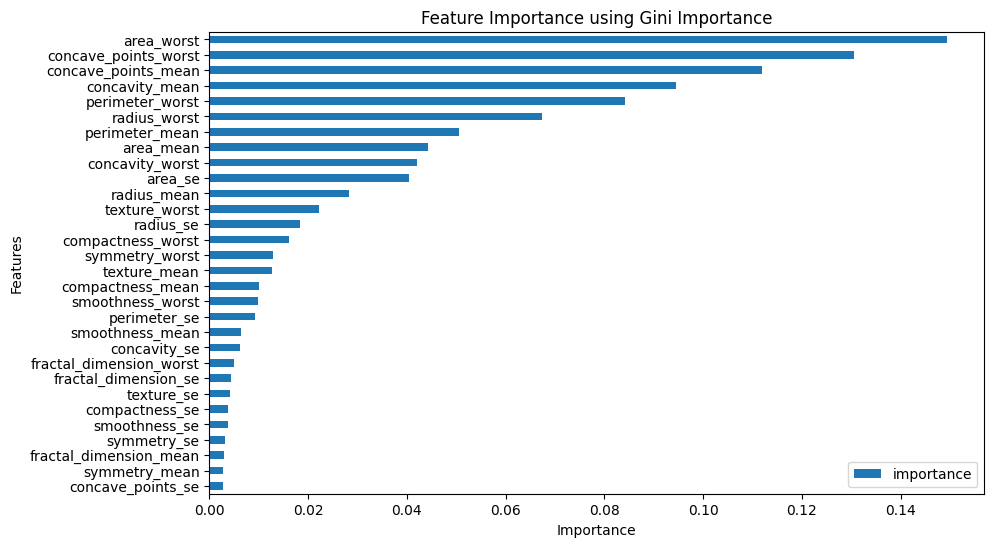

In [6]:
import matplotlib.pyplot as plt

feature_importances.sort_values(by='importance').plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance using Gini Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [7]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
results = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# Get the importances
importances = results.importances_mean


In [8]:
feature_names = X_train.columns
p_feature_importances = pd.DataFrame(importances, index=feature_names, columns=["importance"]).sort_values("importance", ascending=False)

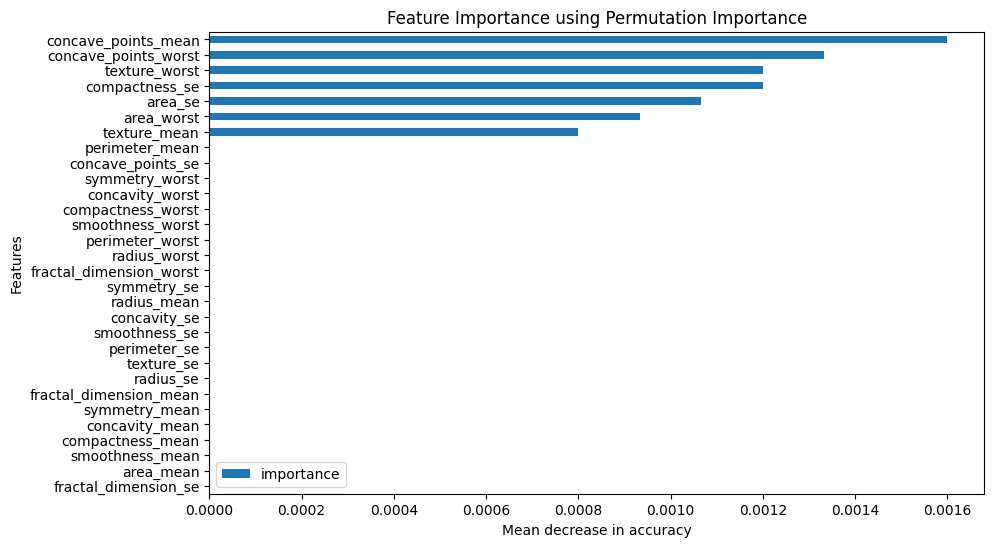

In [9]:
p_feature_importances.sort_values(by='importance').plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance using Permutation Importance')
plt.xlabel('Mean decrease in accuracy')
plt.ylabel('Features')
plt.show()

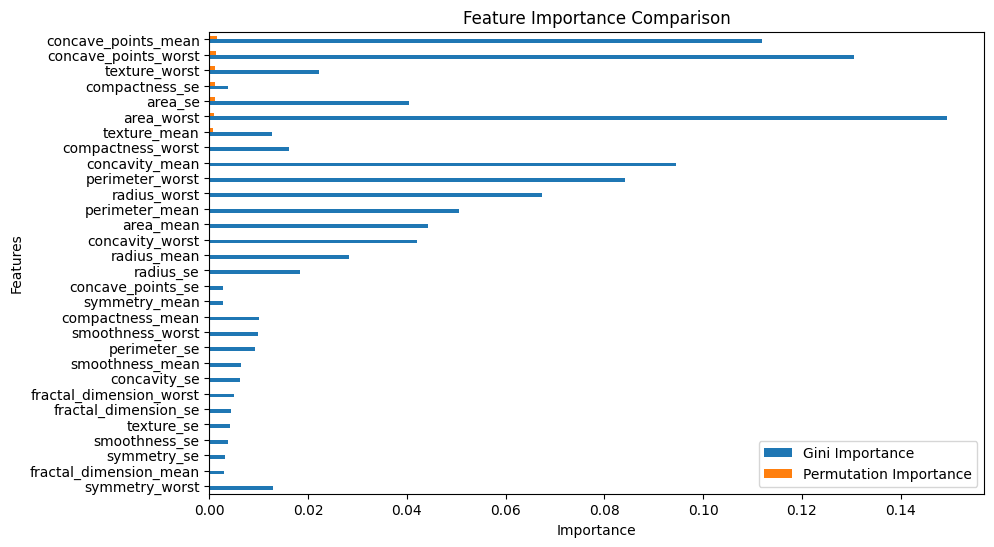

In [10]:
#create a graph that combines the gini and permutation importance
combined_importances = pd.concat([feature_importances, p_feature_importances], axis=1)
combined_importances.columns = ['Gini Importance', 'Permutation Importance']
combined_importances.sort_values(by='Permutation Importance').plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance Comparison')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [11]:
probabilities = model.predict_proba(X_test)

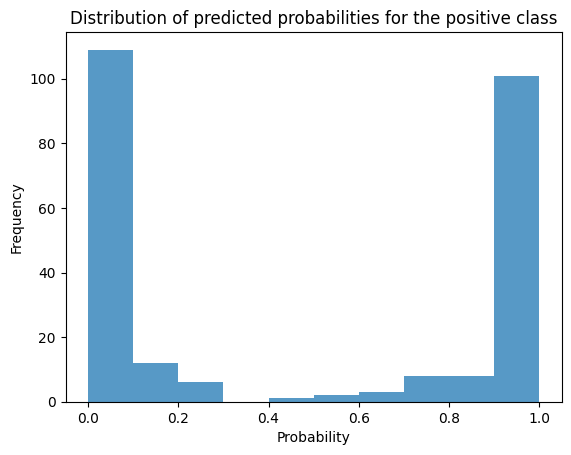

In [12]:
# For a binary classification case
plt.hist(probabilities[:, 1], bins=10, alpha=0.75)
plt.title('Distribution of predicted probabilities for the positive class')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [18]:
model = RandomForestClassifier(n_estimators=150, random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.996

In [16]:
from sklearn.metrics import brier_score_loss

# For binary classification
brier_score = brier_score_loss(y_test, probabilities[:, 1])

In [17]:
display(brier_score)

0.011385999999999999